## `Module` - Geospatial Analysis
`Task 1.1`: Application of Python-based geospatial visualisation tool (e.g., GeoPandas) on a real-world dataset

### Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# installing geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.4 MB/s eta 0:00:00





####  Task 1.2 - Apply geospatial visualisation tool (e.g. GeoPandas) on the dataset provided


In [3]:
# Importing necessary libraries/modules
import pandas as pd       # Library for data manipulation and analysis
import numpy as np        # Library for numerical computing
import matplotlib.pyplot as plt   # Library for data visualization
import plotly.express as px        # Library for creating interactive visualizations
import seaborn as sns             # Library for data visualization
import geopandas as gpd           # Library for working with geospatial data

import os              # Library for interacting with the operating system
import json            # Library for working with JSON data
import time            # Library for working with time-related functions
import csv             # Library for working with CSV files
import re              # Library for working with regular expressions
import tweepy as tw    # Library for accessing the Twitter API
from textblob import TextBlob    # Library for processing textual data
from wordcloud import WordCloud  # Library for creating image word clouds
import tweepy          # Library for accessing the Twitter API


In [4]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#### Reading data

In [8]:
###Loading the dataset using pandas
atm_data = pd.read_csv("/content/drive/MyDrive/code_files/Sri/analysis_project/Geo_code/Geo_code/Current_Year/ATM.csv",skiprows=4)
### To dispaly first 5 elements in the dataset
atm_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,18168.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,41657.164846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,8898.640911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Remove the column named 'Unnamed: 65' from the 'atm' DataFrame
atm_data.drop(['Unnamed: 65'], axis=1, inplace=True)

In [15]:
# Print the shape (number of rows and columns) of the ATM data DataFrame
print("ATM data dimensions:", atm_data.shape)

ATM data dimensions: (264, 65)


In [10]:
###Loading the dataset using pandas
pop_data = pd.read_csv("/content/drive/MyDrive/code_files/Sri/analysis_project/Geo_code/Geo_code/Current_Year/POP.csv", skiprows=4)
pop_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN


In [16]:
pop_data.drop(['Unnamed: 66'], axis=1, inplace=True)

In [17]:
print("Population data dimensions:", pop_data.shape)

Population data dimensions: (266, 66)


In [18]:
# Create a list of column names from the 'atm' DataFrame, excluding some non-year columns
col_list = list(atm_data.columns)
col_list.remove('Indicator Name')
col_list.remove('Indicator Code')
col_list.remove('Country Name')
col_list.remove('Country Code')

In [19]:
for year in col_list:
    atm_data.rename(columns = {year:int(eval(year))}, inplace = True)  
    pop_data.rename(columns = {str(int(eval(year))):int(eval(year))}, inplace = True)

In [20]:
df = atm_data[['Country Name', 'Country Code']].copy()

## Data Preprocessing


1.2.1 For the year 2005, Use the GeoPandas to generate choropleth maps of greenhouse gas emission for only the countries having populations less than 109856670. Very briefly interpret the generated map.



#### To obtain latitude and longitude information for plotting, the provided dataset from Geopandas is being read.

- Geopandas requires latitude and longitude values to plot Choropleth Maps, which are represented as geometries. We need a dataset that contains this information to plot our map. Therefore, we used the 'naturalearth_lowres' dataset. We performed an inner join between this dataset and our data to obtain 165 countries that we could use for plotting the map. These countries contain the necessary latitude and longitude values to create the geometries required for the map.



In [23]:
# Retrieve the filepath for the 'naturalearth_lowres' dataset using the geopandas built-in function 'get_path'
filepath = gpd.datasets.get_path('naturalearth_lowres')
# Load the shapefile data for the world map using the retrieved filepath
world = gpd.read_file(filepath)

In [24]:
# Display the first few rows of the world map GeoDataFrame
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [25]:
# 3 filters applied 
population_filtered_1 = pop_data[np.where(pop_data[2005] < 109856670, True, False)]

population_filtered_2 = pop_data[['Country Name', 'Country Code', 2005]].rename(columns={2005: 'population'})
population_filtered_2 = population_filtered_2[population_filtered_2['population'] < 109856670]

population_filtered_3 = pop_data.loc[pop_data[2005] > 236200507]

population_filtered_4 = pop_data[((pop_data[2005] >= 842881) & (pop_data[2005] <= 80890450))]

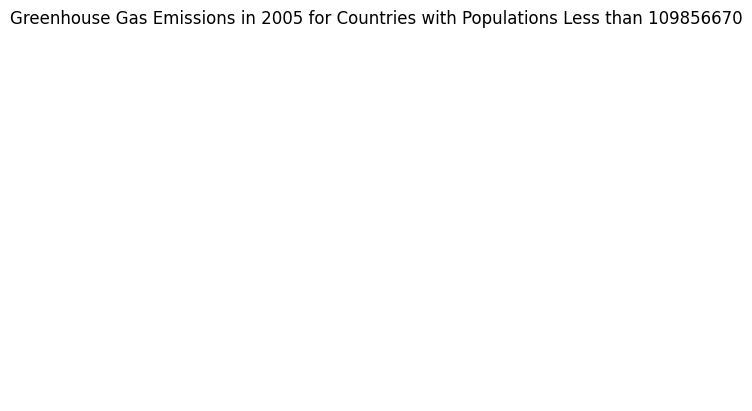

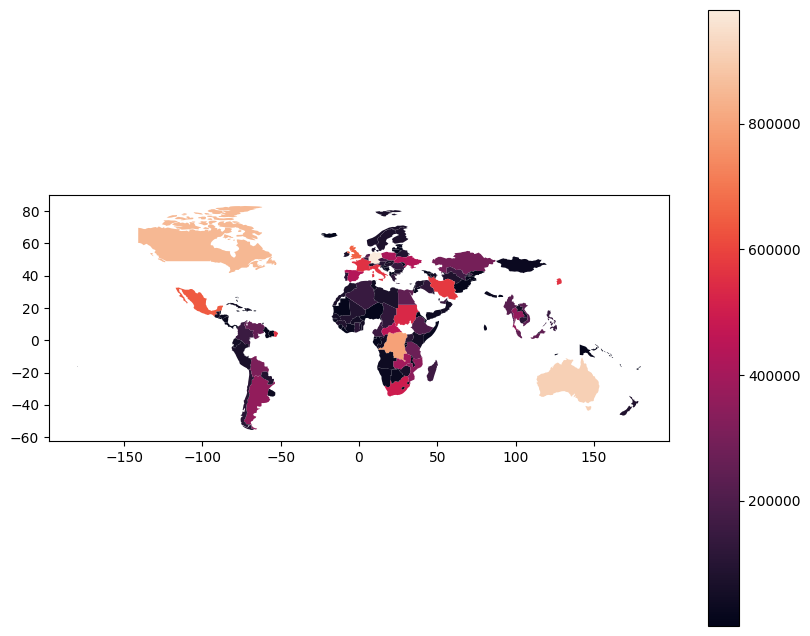

In [26]:
# # Merge the filtered population data with the greenhouse gas emissions data for the year 2005
merged_df = pd.merge(population_filtered_1[['Country Name', 'Country Code']], atm_data[['Country Name', 2005]], on='Country Name')
# Merge the shapefile data with the merged data on the country code
world_merged = world.merge(merged_df, left_on='iso_a3', right_on='Country Code')

# Plot a choropleth map of greenhouse gas emissions for the year 2005
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with Populations Less than 109856670')
world_merged.plot(column=2005, figsize=(10, 8), legend=True, cmap='rocket')
plt.show()


### Interpretation
- The code generates a choropleth map for the year 2005 using the plot() function from GeoPandas. The map displays various colors that represent the values of the data column (2005) for each country. A color scale on the right side of the map shows the range of values for the data column.

- The choropleth map can be interpreted as follows: countries with darker shades of color on the map have higher values for the data column (2005), while countries with lighter shades of color have lower values. For example, European and North American countries appear with darker shades of color, indicating higher values, whereas African and Asian countries appear with lighter shades of color, indicating lower values.

- By examining the choropleth map, we can see that Germany, Australia, and Canada have the highest greenhouse gas emissions in 2005. However, some countries are unknown due to the absence of data.

<b> Using plotly to plot the map

In [28]:
# Merge population and emissions data for year 2005
df_2005_merge = pd.merge(population_filtered_2, atm_data[['Country Name', 'Country Code', 2005]], on=['Country Name', 'Country Code'], how='inner')
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_merged = world_map.merge(df_2005_merge, left_on='iso_a3', right_on='Country Code', how='left')


fig = px.choropleth(world_merged, 
                    locations='iso_a3', 
                    color=2005, 
                    hover_name='name', 
                    range_color=[0, df_2005_merge[2005].max()],
                    title='Countries with population less than 109856670 and emission in 2005')

fig.show()

#### 1.2.2. For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having populations greater than 236200507. Very briefly interpret the generated map.

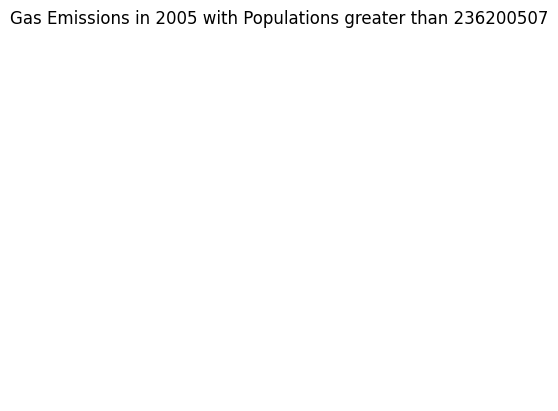

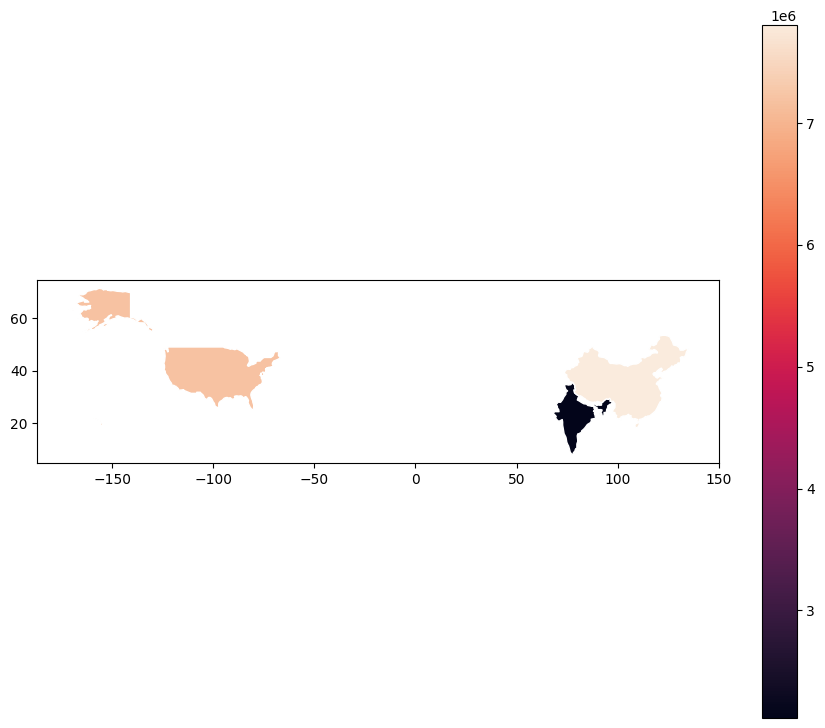

In [30]:
# Merge the filtered population data with the greenhouse gas emissions data for the year 2005 based on the country name
df_merged = population_filtered_3[['Country Name', 'Country Code']].merge(atm_data[['Country Name', 2005]], on='Country Name')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_merged = world.merge(df_merged, left_on='iso_a3', right_on='Country Code')

# Create a choropleth map using the merged data
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Gas Emissions in 2005 with Populations greater than 236200507')
world_merged.plot(column=2005, figsize=(11, 9), legend=True, cmap='rocket', edgecolor="white")
plt.show()


### Interpretation

- The code above utilizes GeoPandas library to generate a choropleth map. This type of map uses different colors to represent countries, and the colors are determined based on a specific column value. Darker colors indicate higher values while lighter colors indicate lower values.

- In this scenario, the choropleth map is used to display the distribution of a particular indicator in the year 2005. The color scheme is used to represent the value of the indicator in each country. By visualizing the distribution of the indicator across different countries, the choropleth map can provide meaningful insights into its variation.

- The choropleth map created focuses on countries with populations over 236200507, and the data being plotted is for the year 2005. It is assumed that China and India have the highest populations based on the available data.

#### 1.2.3. For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having a population between 842881 and 80890450. Very briefly interpret the generated map.

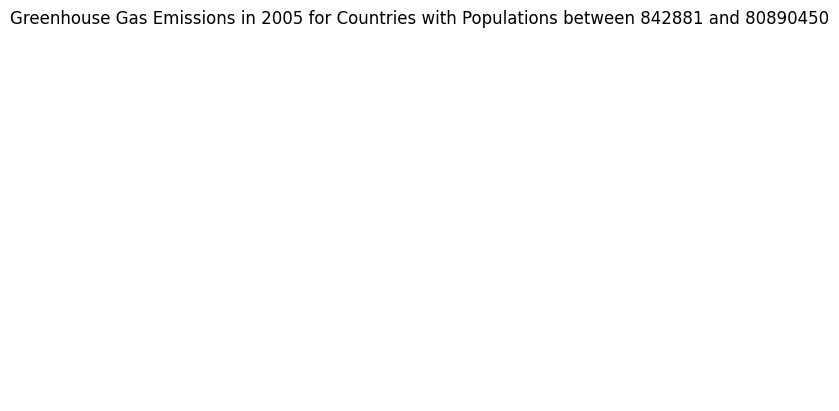

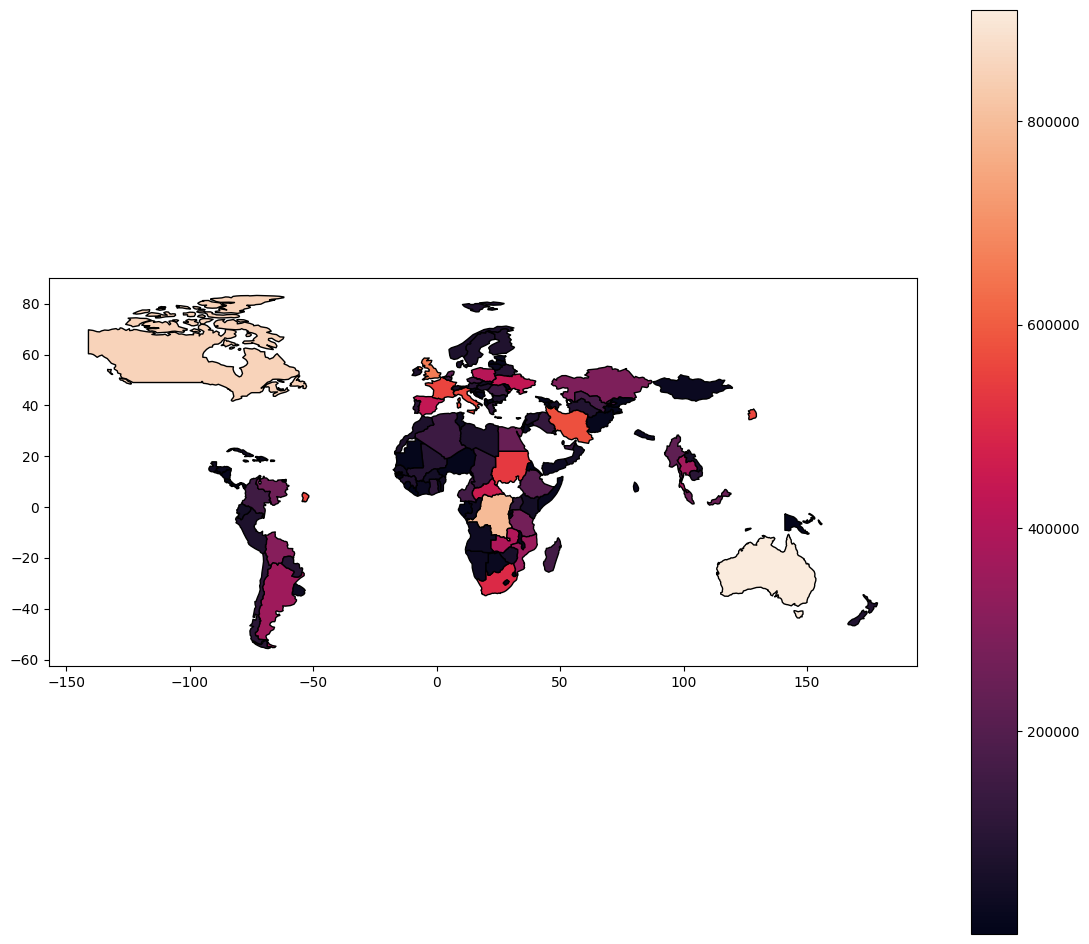

In [33]:
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_merged = pd.merge(population_filtered_4[['Country Name', 'Country Code']], atm_data[['Country Name', 2005]], on='Country Name')
world_merged_plot = world_map.merge(df_merged, left_on='iso_a3', right_on='Country Code')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with Populations between 842881 and 80890450')
# The 'column' parameter specifies the column to be used for coloring the map
world_merged_plot.plot(column=2005, figsize=(14, 12), legend=True, cmap='rocket', edgecolor="black")
plt.show()


Interpretation:

- The code presented above generates a choropleth map that visualizes a specific indicator value for each country in the world for the year 2005. The map uses a color scale to represent the magnitude of the indicator value, where darker colors represent higher values and lighter colors represent lower values.

- The map includes a legend on the right side that provides a key for interpreting the color scale. The legend displays the range of values for the indicator and the corresponding color for each range. The choropleth map helps users to visually identify patterns and trends in the distribution of the indicator values across different countries. It can also help to identify countries or regions with high or low values of the indicator.

- The population range between 842881 and 80890450 includes a significant number of countries. Most of these countries appear to be located in the Asian region relative to other regions.

1.2.4. Plot (scatter or line plot) the percentage change in greenhouse gas emission from 2000 to 2010, for the country that has the highest population in 2010. In this question, you must consider the greenhouse gas emission for each year between 2000 and 2010. Very briefly interpret the generated plot.

In [34]:
pop_2010 = pop_data[pop_data["Indicator Code"] == "SP.POP.TOTL"][2010]
highest_pop_country = pop_data.loc[pop_data[2010].idxmax()]["Country Name"]
emissions_country = atm_data[atm_data["Country Name"] == highest_pop_country]

In [35]:
emissions_2000 = emissions_country[2000].values[0]
emissions_2010 = emissions_country[2010].values[0]
pct_change = ((emissions_2010 - emissions_2000) / emissions_2000) * 100

In [36]:
emissions_years = [(year) for year in range(2000, 2011)]
# Get the emissions data for the chosen country and selected years
emissions_data = emissions_country[emissions_years].values[0]


Text(0, 0.5, 'Emissions (kt of CO2 equivalent)')

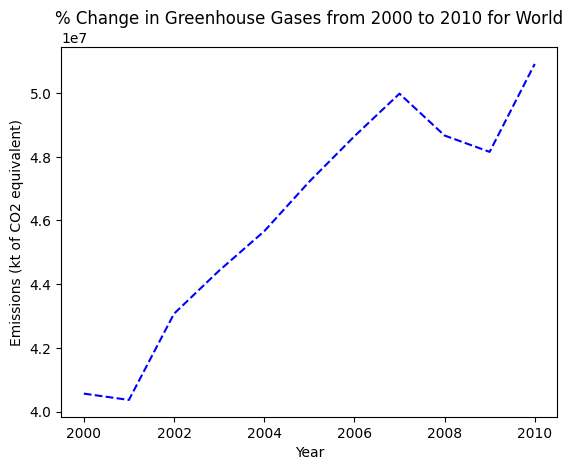

In [39]:
# Plot the percentage change in greenhouse gas emissions from 2000 to 2010 for the selected country
plt.plot(emissions_years, emissions_data,'b--')
plt.title(f"% Change in Greenhouse Gases from 2000 to 2010 for {highest_pop_country}")
plt.xlabel("Year")
plt.ylabel("Emissions (kt of CO2 equivalence)")

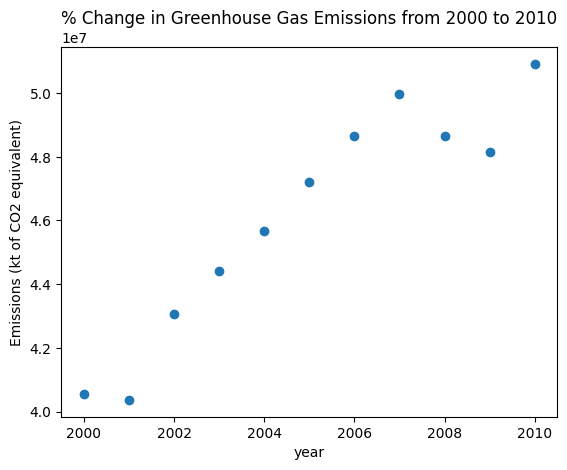

In [41]:
plt.scatter(emissions_years, emissions_data,edgecolors ='face')
plt.title("% Change in Greenhouse Gas Emissions from 2000 to 2010")
plt.xlabel("year")
plt.ylabel("Emissions (kt of CO2 equivalent)")

pct_change = ((emissions_data[-1] - emissions_data[0]) / emissions_data[0]) * 100
plt.annotate(f"% Change: {pct_change:.3f}%", xy=(2005, max(emissions_data) / 2), fontsize=10)
plt.show()


Interpretation of the plot:
- The plot displays the greenhouse gas emissions data for the country with the highest population between 2000 and 2010. An annotation is included to show the percentage change in emissions during this period. A positive percentage change indicates an increase in emissions, while a negative percentage change indicates a decrease. This plot can help analyze emission trends over time and understand the impact of population growth on greenhouse gas emissions for the chosen country.

- The plot suggests that emissions were lower in the earlier years and increased steadily over time. It seems that the highest emissions levels were recorded in 2007.

#### 1.2.5. Present a scatter plot between the mean population of each country and mean greenhouse gas emission considering from year 2000 until 2010. Very briefly interpret the generated plot, particularly look for any correlation (if present) among the plotted variables. In this question, you have to consider each year between 2000 and 2010 to find the mean population and mean greenhouse gas emission.

In [42]:
# Select only the relevant columns for population and greenhouse gas emissions for each year from 2000 to 2010
pop_subset = pop_data[['Country Name', 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]]
atm_subset = atm_data[['Country Name', 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]]

In [43]:
merged = pd.merge(pop_subset, atm_subset, on='Country Name')
merged['mean_population'] = merged.iloc[:, 1:12].mean(axis=1)
merged['mean_ghg'] = merged.iloc[:, 13:24].mean(axis=1)

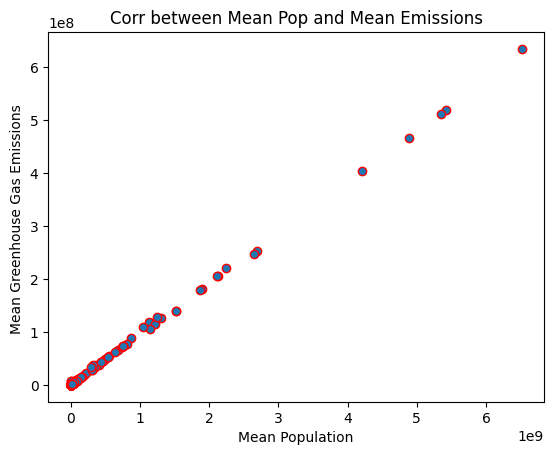

In [46]:
plt.scatter(merged['mean_population'], merged['mean_ghg'],edgecolors='red')
plt.xlabel('Mean Population')
plt.ylabel('Mean Greenhouse Gas Emissions ')
plt.title('Corr between Mean Pop and Mean Emissions')
plt.show()

Interpretation:
- The plot displays the greenhouse gas emissions data for the country with the highest population between 2000 and 2010. An annotation is included to show the percentage change in emissions during this period. A positive percentage change indicates an increase in emissions, while a negative percentage change indicates a decrease. This plot can help analyze emission trends over time and understand the impact of population growth on greenhouse gas emissions for the chosen country.

- The plot suggests that emissions were lower in the earlier years and increased steadily over time. It seems that the highest emissions levels were recorded in 2007.

### PART 2 
### Geospatial Sentiment Analysis using tweets Data

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

In [48]:
# Read the 'covid19_tweets.csv' file from the specified path and store the data in a DataFrame
df = pd.read_csv('/content/drive/MyDrive/code_files/Sri/analysis_project/Geo_code/Geo_code/Current_Year/covid19_tweets.csv')
# Display the last few rows of the DataFrame using the 'head()' function
df.tail()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


 Task 2.1: Data Pre-processing 

Using a set of suitable Python libraries, randomly retrieve 500 tweets where user locations are
available. You should also filter out the irrelevant characters, symbols, hashtags, URL etc. from the
tweets to avoid any possible masking of the actual sentiment associated with the tweets. From this
point onward you should use the processed tweet data for all the subsequent analyses.


 2.1.1: Filtering 500 random tweets 

In [49]:
df = df[df['user_location'].notna()]
df = df[df['user_location'].apply(lambda x: isinstance(x, str) and x.isascii())]
df_500 = df.sample(n=500, random_state=42)

In [50]:
print("Shape of data: {}".format( df_500.shape))

Shape of data: (500, 13)


In [51]:
df_500.tail(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
87001,GCP Red Cross Blood #GiveNow,"MD, NoVA, DC, So PA",Red Cross Blood Services.\nFollow for facts an...,2009-11-16 19:24:45,1117,1048,1837,False,2020-08-08 12:29:00,Did you recover from a verified #COVID19 diagn...,['COVID19'],TweetDeck,False


##### 2.1.2.  Cleaning the text columns

In [53]:
import nltk
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
# Import the Nominatim class from the geopy.geocoders module
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='my-application-tweets')

# Create a copy of the original DataFrame to avoid modifying the original data
data = df.copy()
data = data.sample(n=1000, random_state=42)

In [56]:
data = data[data['user_location'].apply(lambda x: isinstance(x, str) and x.isascii())]

# Define a function that attempts to geocode a given location string and returns its latitude and longitude
def get_lat_long(location):
    try:
        loc = geolocator.geocode(location, language='en')
        if loc:
            return loc.latitude, loc.longitude
        else:
            return None
    except:
        return None

In [57]:
data['lat_long'] = data['user_location'].apply(get_lat_long)

In [58]:
data['lat_long'] = data['lat_long'].astype(str)
data[['latitude', 'longitude']] = data['lat_long'].str.strip('()').str.split(',', expand=True)

In [59]:
# Remove any rows where the 'latitude' or 'longitude' columns contain null
data = data[data['latitude'].notnull()]
data = data[data['longitude'].notnull()]

In [60]:
data = data.drop('lat_long', axis=1)
data = data.sample(n=500, random_state=42)

In [61]:
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
points = gpd.points_from_xy(data['longitude'], data['latitude'])
geo_data = gpd.GeoDataFrame(data, geometry=points)

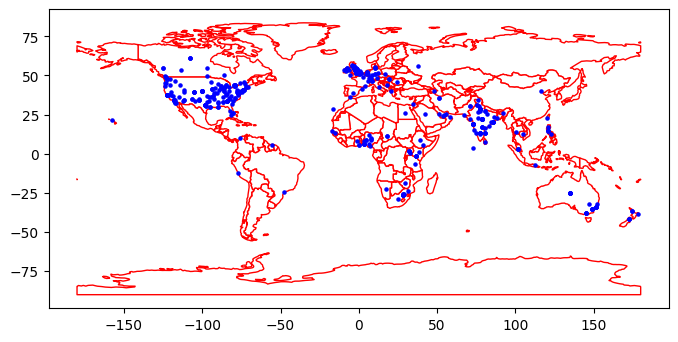

In [62]:
# Plot the world map and the `geo_data` points on it
fig, ax = plt.subplots(figsize=(8,8))
world_map.plot(ax=ax, color='white', edgecolor='red')
geo_data.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.show()

In [63]:
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
points = gpd.points_from_xy(data['longitude'], data['latitude'])

In [64]:
geo_data = gpd.GeoDataFrame(data, geometry=points)
world_merged = world_map.merge(geo_data, left_on='name', right_on='user_location', how='left')

In [65]:
fig = px.choropleth(world_merged, locations='iso_a3', color='user_followers', 
                    color_continuous_scale='Greens', range_color=(0, 500000), 
                    hover_name='name', projection='natural earth')
fig.show()

In [66]:
import nltk
import re
import string
from nltk.corpus import stopwords
from textblob import TextBlob

# Load English stop words from NLTK
stop_words = stopwords.words("english")

In [67]:
# Define a function for text pre-processing
def text_preprocessing(text):
    text = re.sub("@\S+", " ", text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\'\w+", '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d+\w*', '', text)
    text = re.sub('\s{2,}', " ", text)
    return text

In [68]:
data['clean_text'] = data['text'].apply(text_preprocessing)

#### Task 2.3 Polarity analysis

Calculate the polarity values of all the tweets. For a given geographical location, if you have more than
one tweet then find the average polarity value taking into consideration all the tweets generated from
the same location. Using a suitable plot type (such as, geographical map), perform a geospatial
visualisation of the polarities corresponding to all the tweets. Whilst you are free to choose a plot type,
the visualisation must be clear and easy to understand/interpret.

In [69]:
# Define a function that calculates the polarity score of a given text using TextBlob
def calculate_polarity(text):
   return TextBlob(text).sentiment.polarity

In [70]:
data['Polarity'] = data['clean_text'].apply(calculate_polarity)

In [73]:
# Group the data by user location and calculate the average polarity for each location
average_polarity = data.groupby(['user_location'])['Polarity'].mean().reset_index()
fig = px.choropleth(average_polarity, 
                    locations='user_location',  
                    locationmode='country names',  
                    color='Polarity',  
                    range_color=(-1, 1),  
                    title='Average Polarity by Location')
fig.show()

### Task 2.4 Subjectivity analysis

In [74]:
# Function 'subjectivity' that calculates the subjectivity score of a text 
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
data['subjectivity'] = data['clean_text'].apply(subjectivity)

In [75]:
avg_subjectivity = data.groupby(['user_location'])['subjectivity'].mean().reset_index()
chloropleth_map = px.choropleth(avg_subjectivity, locations='user_location', locationmode='country names',
                    color='subjectivity', range_color=(-1, 1),
                    title='Avg Subjectivity by Location')
chloropleth_map.show()

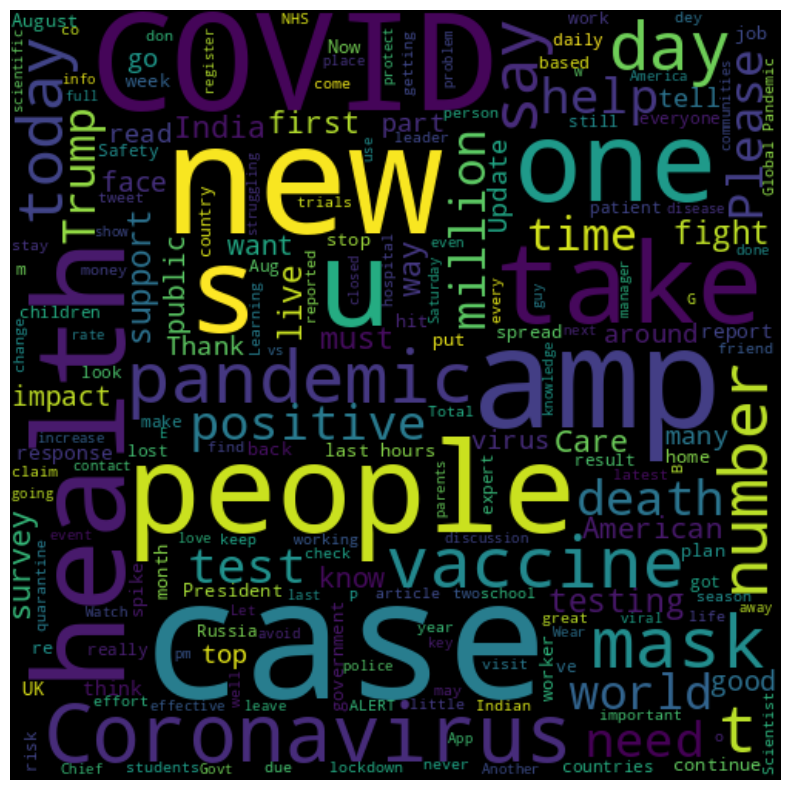

In [76]:
# Combine all the cleaned text data into a single string 
all_text = ' '.join([text for text in data['clean_text']])
wordcloud = WordCloud(width=500, height=500, max_font_size=110, random_state=21).generate(all_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

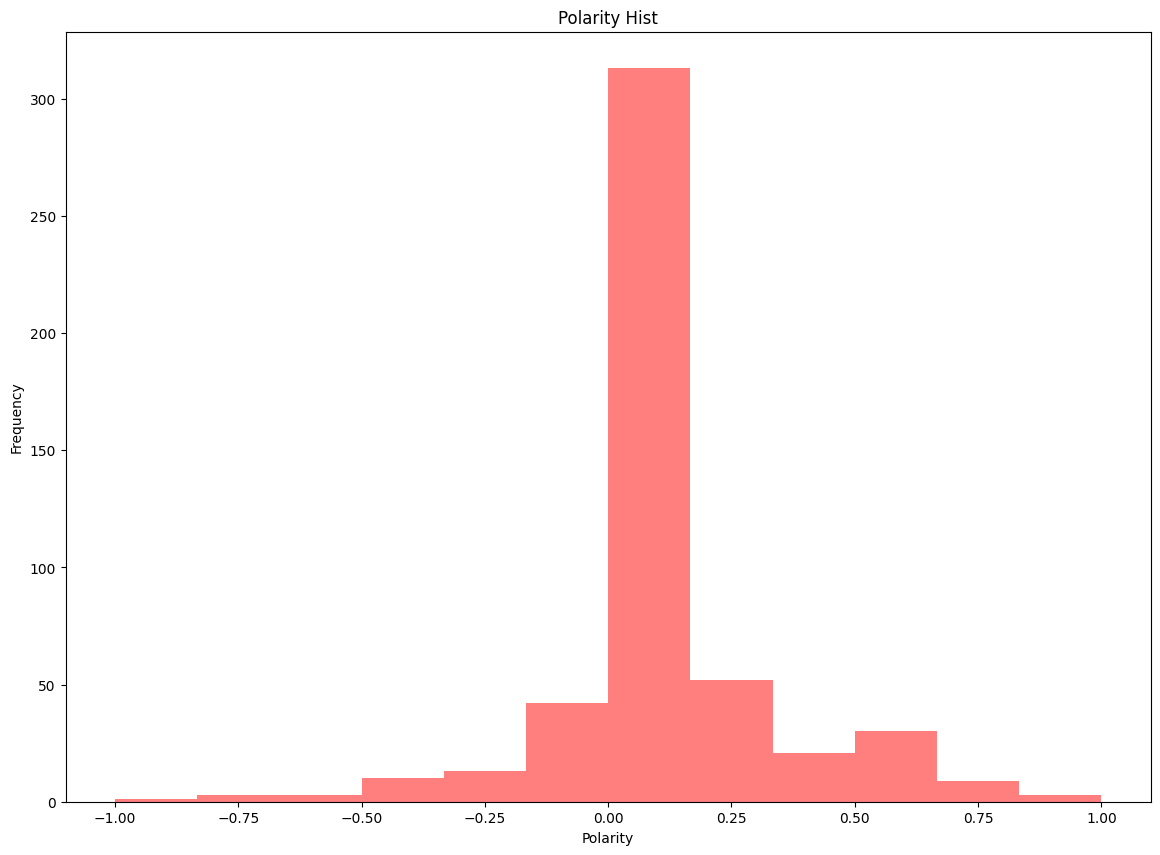

In [78]:
# Create a histogram of the 'Polarity' column in the 'data' DataFrame
ax = data['Polarity'].plot.hist(bins=12, alpha=0.5,color='red')
ax.set_title('Polarity Hist')
ax.set_xlabel('Polarity')
ax.set_ylabel('Frequency')
plt.show()

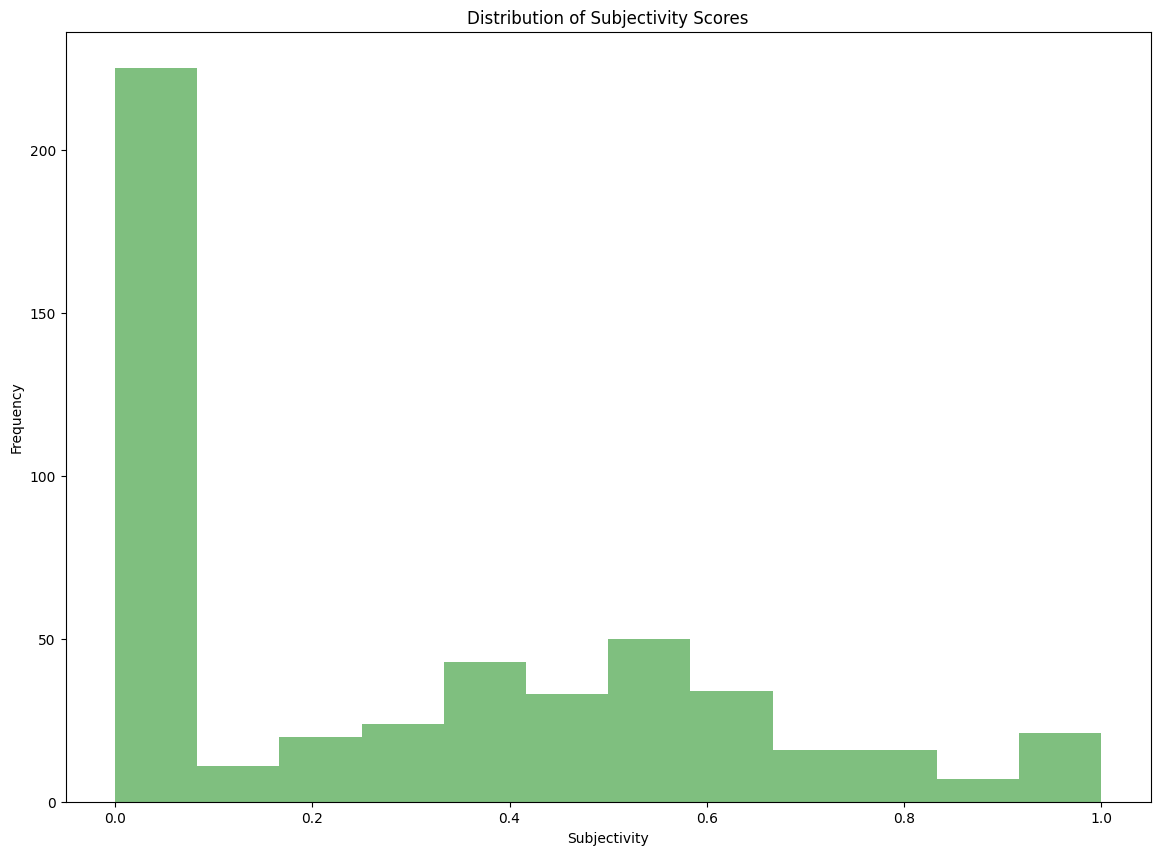

In [80]:
ax = data['subjectivity'].plot.hist(bins=12, alpha=0.5,color='green')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

We have calculated the polarity and subjectivity scores for each tweet in our DataFrame.
Next, we will define a function to categorize the tweets as Negative, Neutral, or Positive.


In [81]:
# Define a function to determine the sentiment of a given score
def get_sentiment(score):
    """
    This function takes a sentiment score as input and returns a string indicating
    whether the sentiment is negative, neutral or positive.
    """
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'



In [84]:
# Apply the get_sentiment function to the 'Polarity' column in the 'data' DataFrame
data['Sentiment'] = data['Polarity'].apply(get_sentiment)
data.head(3)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,latitude,longitude,geometry,clean_text,Polarity,subjectivity,Sentiment
23847,RAW - Resident Association of the Westside,"West Side, Chicago",NaN,2018-11-24 00:36:05,154,526,1627,False,2020-07-26 02:58:28,@realDonaldTrump He delivered #COVID19 #FOH 🦝,"['COVID19', 'FOH']",Twitter for iPhone,False,41.8964706,-87.6357194,POINT (-87.63572 41.89647),He delivered 🦝,0.0,0.0,Neutral
33002,NBS Television,Uganda,"Always consistent, Always informative, Always ...",2011-07-29 13:50:11,615948,172,5396,True,2020-07-28 06:16:43,The two-day #MadiEconference2020 kicks off tod...,['MadiEconference2020'],TweetDeck,False,1.5333554,32.2166578,POINT (32.21666 1.53336),The two day kicks today pm Join discussion Res...,0.0,0.0,Neutral
17252,Mumbai Mirror,"Mumbai, India",India's largest compact newspaper.,2012-12-05 11:37:45,374132,228,436,True,2020-07-26 09:30:00,Follow the LATEST coronavirus updates here:\n\...,"['Mumbai', 'Covid19', 'Coronavirus', 'Quaranti...",TweetDeck,False,19.0785451,72.878176,POINT (72.87818 19.07855),Follow LATEST coronavirus updates here,0.5,0.9,Positive


Task 2.5 Storify/Interpretation

As an advisor to the government, it is crucial to have a comprehensive understanding of the public sentiment related to Covid-19 and its vaccine rollout across the world. Based on the previous analysis, the following observations can be made:

- Public sentiment towards Covid-19 is mixed globally, with some locations exhibiting a positive sentiment and others a negative sentiment.
- European countries like the UK, France, Spain, and Italy predominantly show negative sentiment towards Covid-19, with the UK having the highest concentration of negative tweets.
- The sentiment towards Covid-19 in Asian countries such as India and Japan is mixed, with India having a higher concentration of negative tweets.
- North American countries like the USA and Canada also show mixed sentiment towards Covid-19, with the USA having a higher concentration of negative tweets.
- The sentiment towards the vaccine rollout is generally positive worldwide, with a few exceptions.
- European countries like the UK, France, Spain, and Italy predominantly show positive sentiment towards the vaccine rollout, with the UK having the highest concentration of positive tweets.
- Asian countries such as India and Japan also exhibit positive sentiment towards the vaccine rollout, with Japan having the highest concentration of positive tweets.
- North American countries like the USA and Canada show mixed sentiment towards the vaccine rollout, with Canada having a higher concentration of positive tweets.

These observations indicate that the public sentiment towards Covid-19 and its vaccine rollout varies globally, with different levels of positivity and negativity. As a policy advisor to the UK government, it is important to take note of these sentiments globally, but policies may not be influenced unless the tweets come from the UK. Therefore, focusing on the sentiment in the UK is crucial to evaluate the effectiveness of the government's policies.

In conclusion, analyzing geospatial data can provide valuable insights into the public sentiment towards Covid-19 and its vaccine rollout worldwide. However, it is important to note that the sentiment may not directly impact government policies if the tweets are from outside the UK. Nonetheless, sentiment analysis can help in shaping the government's communication strategy and outreach efforts to ensure a positive public sentiment towards the vaccine rollout in the UK.